In [3]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import math

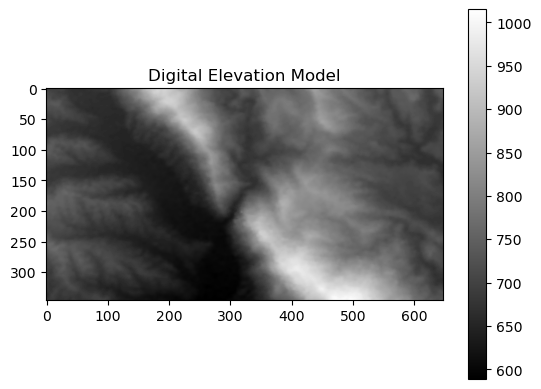

In [4]:
# Replace this with the path to your DEM file
# Load the DEM data
dem_data = rasterio.open('data/input/dem.tif')
dem_array = dem_data.read(1)
transform = dem_data.transform

# Plot DEM data
plt.imshow(dem_array, cmap='gray')
plt.colorbar()
plt.title('Digital Elevation Model')
plt.show()

In [5]:

def is_visible(dem_array, x1, y1, x2, y2):
    """Determine if the point (x2, y2) is visible from (x1, y1) in dem_array."""
    
    # Calculate the number of steps for iteration based on the greater of dx or dy
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))

    # Handle the case when steps is zero
    if steps == 0:
        return False

    # Calculate the increments for x and y
    x_inc = dx / steps
    y_inc = dy / steps

    # Start from the source point
    x = x1
    y = y1

    # Height at the source point
    z = dem_array[int(y1), int(x1)] + 20

    # Iterate over the cells between source and target
    for i in range(1, int(steps)):
        x += x_inc
        y += y_inc

        # Calculate the elevation of the direct line at this point
        line_elevation = z + (dem_array[int(y2), int(x2)] - z) * (i / steps)

        # If the DEM elevation at this point is higher than the direct line, it's not visible
        if dem_array[int(y), int(x)] > line_elevation:
            return False

    return True


# Define transmitter coordinates
transmitter_x, transmitter_y = 76.611022,31.514496  # Example coordinates


# Transforming lat long into grid coordinates
inv_transform = ~transform
transmitter_x, transmitter_y = [int(round(coord))
            for coord in inv_transform * (transmitter_x, transmitter_y)]
print(transmitter_x, transmitter_y)

# Create an empty array for visibility
visibility_array = np.zeros_like(dem_array)

# Check visibility for each pixel
for x in range(dem_array.shape[1]):
    for y in range(dem_array.shape[0]):
        visibility_array[y, x] = is_visible(dem_array, transmitter_x, transmitter_y, x, y)

280 162


In [8]:
with rasterio.open('data/result/los.tif', 'w', **dem_data.meta) as dst:
    dst.write(visibility_array, 1)


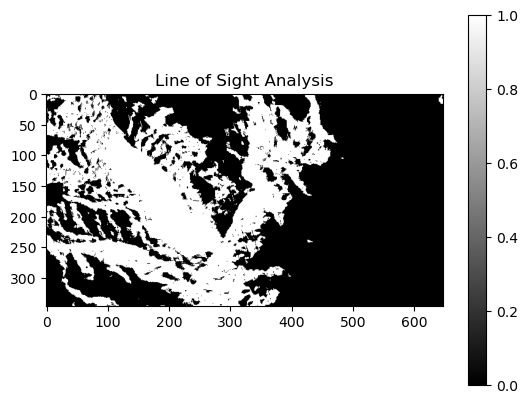

In [7]:
plt.imshow(visibility_array, cmap='gray')
plt.colorbar()
plt.title('Line of Sight Analysis')
plt.show()